In [1]:
from numpy import *
from matplotlib.pyplot import *
from numpy import log as ln

In [2]:
D1 = 0.2 #m
r1 = D1/2
Ts1 = 545 #K
Tinf = 300 #K
h = 0.36 #W/m^2*K
vinf = 7 #m/s
Tw = 550 #K
vw = 25 #m/s
kCaSi = 0.07 #W/m*K
L = 6 #m

D2 = array([0, 0.025, 0.050, 0.075]) #m
r2 = D2/2
rtot = r2 + r1

Ts2 = [0,0,0,0]
Qconv = [0,0,0,0]

e1 = 0.28
e2 = 0.8
stef = 5.676E-8 #W/m^2K^4

Qrad = [0,0,0,0]
A = [0,0,0,0]

In [3]:
for i, ri in enumerate(rtot):
    if ri == rtot[0]:
        Qconv[i] = h * 2 * pi * ri * L * (Ts1 - Tinf)

    else:
        Ts2[i] = (kCaSi*Ts1/ri/ln(ri/rtot[0])+h*Tinf)/(h+ kCaSi/ri/ln(ri/rtot[0]))
        Qconv[i] = h * 2 * pi * ri * L * (Ts2[i] - Tinf)

In [4]:
for i, ri in enumerate(rtot):
    A[i] = 2 * pi * ri * L
    
    if ri == rtot[0]:
        Qrad[i] = e1 * stef * A[i] * (Ts1**4 - Tinf**4)

    else: 
        F12 = 1
        F21 = rtot[0]/ri
        
        Rg1 = (1-e1)/(A[0]*e1)
        Rg2 = (1-e2)/(A[i]*e2)
        R1s = 1/(A[0]*F12)
        R2s = 1/(A[i]*F21)
        Rtot = Rg1 + Rg2 + R1s + R2s
        
        

        Qrad[i] = stef * (Ts1**4 - Tinf**4) / Rtot

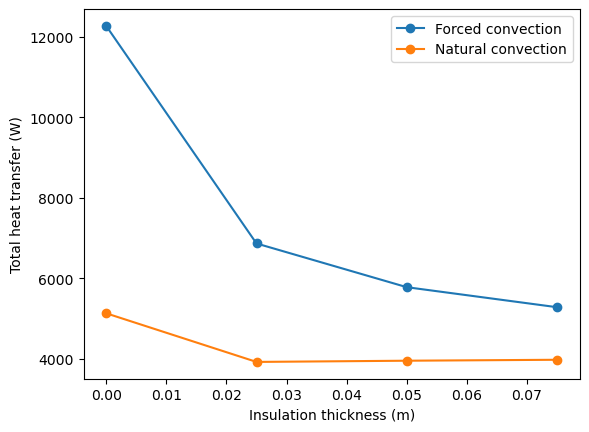

In [24]:
Qconv = array(Qconv)
Qrad = array(Qrad)
Q = Qconv+ Qrad
Qf = array([12263.2, 6865.5, 5780.9, 5284.1])

plot(D2, Qf, '-o', D2, Q, '-o')
ylabel('Total heat transfer (W)')
xlabel('Insulation thickness (m)')
legend(['Forced convection', 'Natural convection'])
show()

In [14]:
Ts2[0] = 545
Ts2 = array(Ts2)
print(f'Outer surface temperature (K): {Ts2}')
print(f'Radiative heat loss rate (W): {Qrad}')
print(f'Convective heat loss rate (W): {Qconv}')
print(f'Total heat loss rate (W): {Q}')
print(f'Total outer diameter (m): {D2+D1}')

Outer surface temperature (K): [545.         529.36941497 514.26395821 499.96861206]
Radiative heat loss rate (W): [4800.57599899 3576.58807872 3593.24550823 3606.99016318]
Convective heat loss rate (W): [332.50616646 350.20444074 363.49024161 373.16263403]
Total heat loss rate (W): [5133.08216545 3926.79251946 3956.73574984 3980.1527972 ]
Total outer diameter (m): [0.2   0.225 0.25  0.275]
